In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("road.jpg")
cv2.imshow("Image", image)
cv2.waitKey()
cv2.destroyAllWindows()

## Convert the image to gray-scale mode 

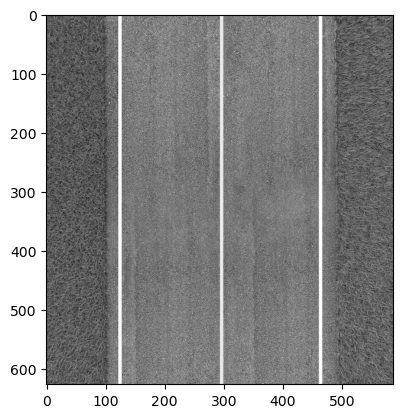

In [3]:
image_gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray_scale, cmap="gray")

# cv2.imshow("Image", image_gray_scale)
# cv2.waitKey()
# cv2.destroyAllWindows()

## Use Gaussian Filter to blur the image 

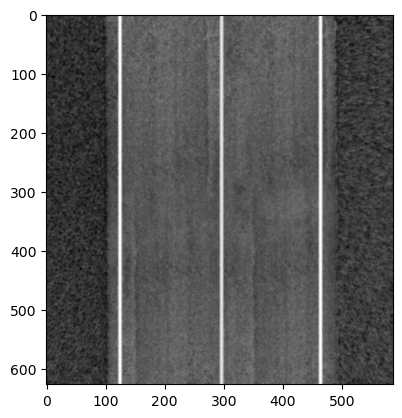

In [4]:
blur_image = cv2.GaussianBlur(image_gray_scale, (5,5), 0)
plt.imshow(blur_image, cmap="gray")


##  Filter the colors of the image somehow that just the road lanes be visible

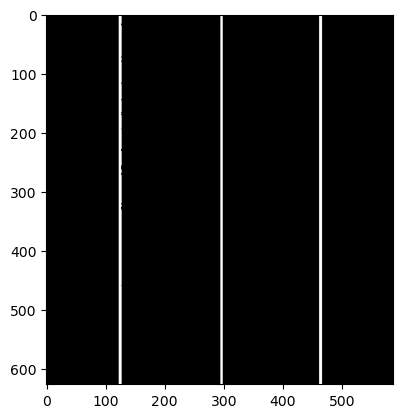

In [5]:
# 1
_, thresh_image = cv2.threshold(blur_image,210,255,cv2.THRESH_BINARY)

# 2
# _, thresh_image_2 = cv2.threshold(blur_image,210,255,cv2.THRESH_TOZERO)

plt.imshow(thresh_image, cmap="gray")


## Detect the edges on the image, and indicate the lines

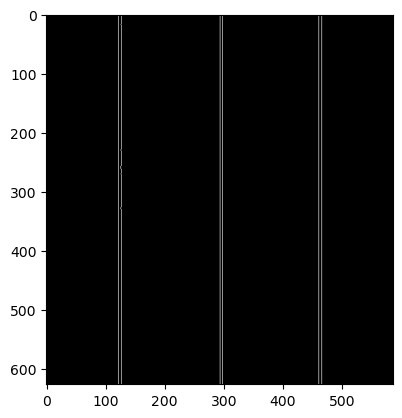

In [6]:
edge_image = cv2.Canny(thresh_image, 100, 200)
plt.imshow(edge_image, cmap="gray")


## Plot the lines on the source image

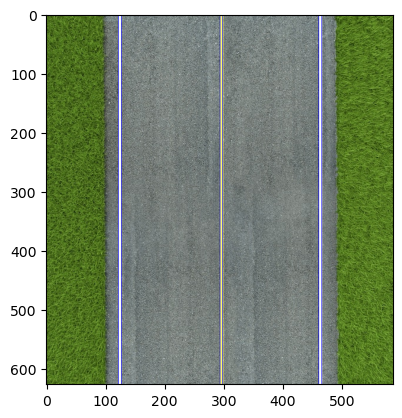

In [7]:
lines = cv2.HoughLinesP(edge_image, rho = 1, theta = np.pi/180, threshold = 50, 
                                  minLineLength = 10, maxLineGap = 250)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 1)

image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)


In [8]:
lines

array([[[298, 625, 298,   0]],

       [[122, 625, 122,   0]],

       [[466, 625, 466,   0]],

       [[461, 625, 461,   0]],

       [[127, 625, 127,   0]],

       [[294, 625, 294,   0]]], dtype=int32)

## Segment the road regions with red, and green colors

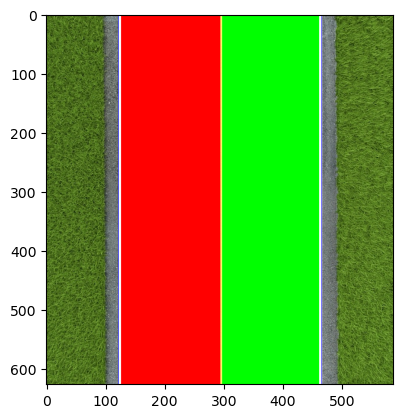

In [9]:
rectangle_image =  cv2.rectangle(image,(127, 0),(294, 625),(0,0,255),-1)  #left
rectangle_image =  cv2.rectangle(image,(298, 0),(461, 625),(0,255,0),-1)  #right
rectangle_image_RGB = cv2.cvtColor(rectangle_image, cv2.COLOR_BGR2RGB)
plt.imshow(rectangle_image_RGB)


## Final function

In [10]:
def road_lane_segmentation(source_image, filename):
    """
    This function segments the road lanes using the OpenCV library.
    """
    
    image = cv2.imread(source_image)
    
    # ------------- convert the image to gray-scale mode -------------
    image_gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # ------------- use Gaussian Filter to blur the image -------------
    blur_image = cv2.GaussianBlur(image_gray_scale, (5,5), 0)
    
    # ------------- filter the colors of the image somehow that just the road lanes be visible -------------
    _, thresh_image = cv2.threshold(blur_image,210,255,cv2.THRESH_BINARY)

    # ------------- detect the edges on the image, and indicate the lines -------------
    edge_image = cv2.Canny(thresh_image, 100, 200)

    # ------------- plot the lines on the source image -------------
    lines = cv2.HoughLinesP(edge_image, rho = 1, theta = np.pi/180, threshold = 50, minLineLength = 10, maxLineGap = 250)

    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 1)

    # ------------- segment the road regions with red, and green colors -------------
    rectangle_image =  cv2.rectangle(image,(127, 0),(294, 625),(0,0,255),-1)  #left
    rectangle_image =  cv2.rectangle(image,(298, 0),(461, 625),(0,255,0),-1)  #right
    
    # ------------- show finalimage -------------
    rectangle_image_RGB = cv2.cvtColor(rectangle_image, cv2.COLOR_BGR2RGB)
    plt.imshow(rectangle_image_RGB)
    
    # cv2.imshow("Final image", rectangle_image)
    # cv2.waitKey()
    # cv2.destroyAllWindows()
    
    # ------------- save the image -------------
    cv2.imwrite(filename, rectangle_image)
    print('Successfully saved')

Successfully saved


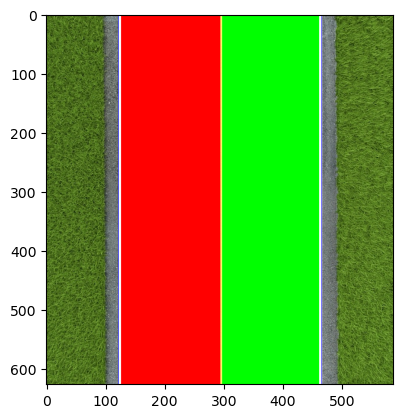

In [11]:
road_lane_segmentation("road.jpg", "lane_segment.jpg")